#Cluster display of stock market returns

##import library

In [66]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

##Define the stock specifications

In [67]:
stock_symbol = "GOLD"
start_date = "2019-07-15"
end_date = "2023-07-15"

##Download the stock data from Yahoo Finance

In [68]:
df = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


##Return_Daily=V_(today-V_yesterday )/V_yesterday *100
*   Calculate the daily returns (mohasebeye bazdehye ruzaneh)

In [69]:
df['Returns'] = df['Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2019-07-15,16.570000,16.680000,16.230000,16.340000,14.630970,11321700,NaN
2019-07-16,16.200001,16.400000,15.950000,16.110001,14.425028,11751400,-0.014076
2019-07-17,16.209999,16.750000,16.150000,16.709999,14.962269,17923800,0.037244
2019-07-18,16.650000,17.360001,16.480000,17.219999,15.418927,23548300,0.030521
2019-07-19,17.070000,17.480000,17.030001,17.209999,15.409973,24499300,-0.000581
...,...,...,...,...,...,...,...
2023-07-10,16.270000,16.549999,16.240000,16.530001,16.428837,16319600,0.011628
2023-07-11,16.620001,16.740000,16.530001,16.709999,16.607735,11802500,0.010889
2023-07-12,16.990000,17.530001,16.950001,17.480000,17.373022,19715500,0.046080


##Drop the first row (which has a NaN value)(radife aval k meghdare 'NaN' darad ra cut mikonim)

In [70]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2019-07-16,16.200001,16.400000,15.950000,16.110001,14.425028,11751400,-0.014076
2019-07-17,16.209999,16.750000,16.150000,16.709999,14.962269,17923800,0.037244
2019-07-18,16.650000,17.360001,16.480000,17.219999,15.418927,23548300,0.030521
2019-07-19,17.070000,17.480000,17.030001,17.209999,15.409973,24499300,-0.000581
2019-07-22,17.180000,17.400000,17.100000,17.340000,15.526381,14146800,0.007554
...,...,...,...,...,...,...,...
2023-07-10,16.270000,16.549999,16.240000,16.530001,16.428837,16319600,0.011628
2023-07-11,16.620001,16.740000,16.530001,16.709999,16.607735,11802500,0.010889
2023-07-12,16.990000,17.530001,16.950001,17.480000,17.373022,19715500,0.046080


##Cut the returns column(sotune 'Returns' ra cut karde)

In [71]:
X = df[['Returns']]
X

,Returns
Date,
2019-07-16,-0.014076
2019-07-17,0.037244
2019-07-18,0.030521
2019-07-19,-0.000581
2019-07-22,0.007554
...,...
2023-07-10,0.011628
2023-07-11,0.010889
2023-07-12,0.046080


##Standardize the data(Normalsazi)

In [72]:
X = (X - X.mean()) / X.std()

##Split the data into training and test sets

In [73]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

##Perform KMeans clustering on the training set(khooshe bandi 'K_Means' dar dataye train)

In [74]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
X_train['Cluster'] = kmeans.labels_

##Apply the clustering to the test set(khooshe bandi 'K_Means' dar dataye test)

In [76]:
X_test['Cluster'] = kmeans.predict(X_test)

##Plot the clusters on the training and test sets(rasme khusheha)

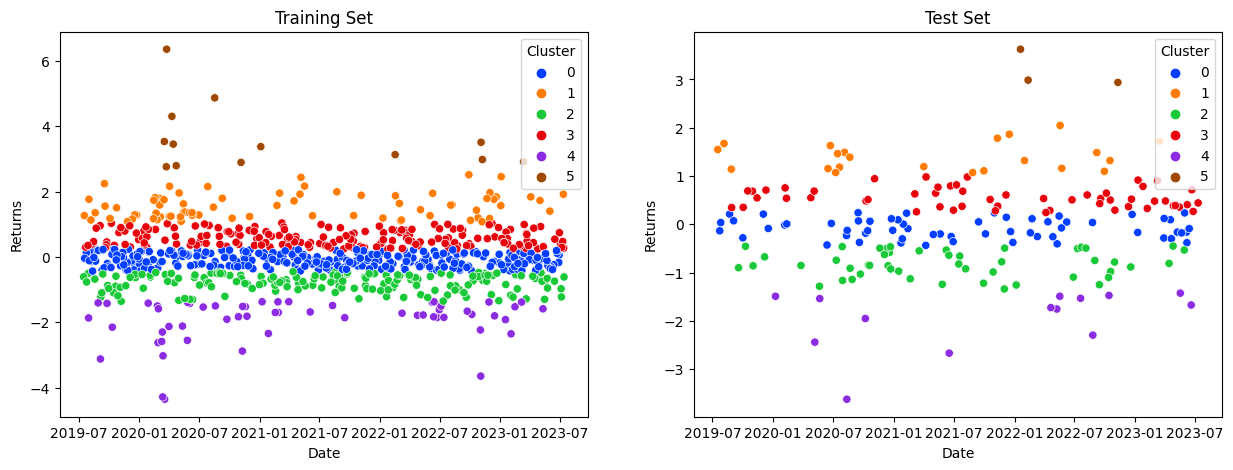

In [77]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.scatterplot(data=X_train, x=X_train.index, y='Returns', hue='Cluster', palette='bright', ax=axs[0])
sns.scatterplot(data=X_test, x=X_test.index, y='Returns', hue='Cluster', palette='bright', ax=axs[1])
axs[0].set(title='Training Set')
axs[1].set(title='Test Set')
plt.show()

##Evaluate the performance of KMeans on the training set using Silhouette(amalkarde "KMeans" ruye dataye "train" ba arzyabiye "Silhouette")

*   Determining the best cluster(taiine behtarin tedade cluster)

In [78]:
def find_best_n_clusters(X):
    silhouette_scores = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return best_n_clusters

##Find the best number of clusters for training data

In [79]:
best_n_clusters_train = find_best_n_clusters(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

##Fit KMeans with the best number of clusters for training data

In [80]:
kmeans_train = KMeans(n_clusters=best_n_clusters_train)
kmeans_train.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

##Find the best number of clusters for test data

In [81]:
best_n_clusters_test = find_best_n_clusters(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

##Fit KMeans with the best number of clusters for test data

In [82]:
kmeans_test = KMeans(n_clusters=best_n_clusters_test)
kmeans_test.fit(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

##Get the labels for test data(index dataye test)

In [83]:
test_cluster_labels = kmeans_test.labels_
test_label=print(test_cluster_labels)

[2 0 1 0 3 1 4 3 1 2 0 0 0 1 1 0 2 1 3 1 1 4 1 0 0 0 2 0 0 2 1 1 1 0 2 0 2
 2 1 4 0 0 1 2 2 0 1 1 3 2 2 0 5 0 0 0 2 3 2 2 0 1 1 4 2 2 3 0 2 1 0 2 1 2
 1 1 1 0 0 1 1 1 1 0 2 3 1 1 2 1 0 0 4 1 0 2 2 0 2 2 0 0 2 2 1 0 5 1 2 1 1
 4 2 0 0 1 5 2 4 0 4 1 1 3 0 4 2 1 1 0 2 1 4 4 1 4 0 0 3 4 0 3 0 2 4 2 2 1
 2 0 2 0 2 0 0 0 4 1 2 1 0 1 1 4 2 0 0 0 0 0 2 2 2 3 3 0 4 1 0 0 3 1 4 0 4
 1 2 2 1 1 4 2 4 3 2 2 0 1 4 0 0 1]


##Plot the evaluation metrics for training data(meyare arzyabi baraye dataye test)

In [84]:
silhouette_scores_train = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    silhouette_scores_train.append(silhouette_score(X_train, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [85]:
scores=print(silhouette_scores_train)

[0.5948967870000333, 0.6534947249425198, 0.7105985473262383, 0.808085905847715, 0.8431404902383104, 0.841376601376719, 0.8420745837403213, 0.7000605505359702]


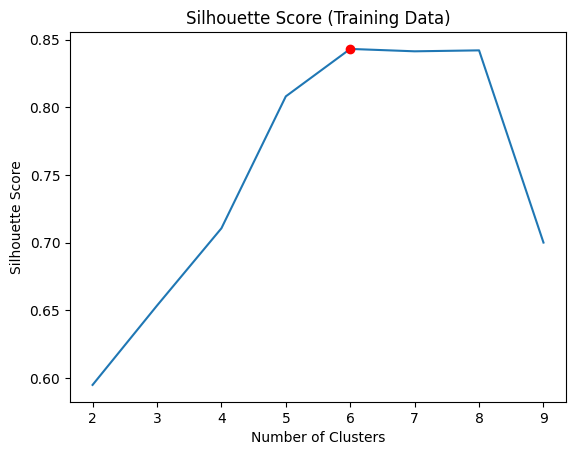

In [86]:
sns.lineplot(x=range(2, 10), y=silhouette_scores_train)
plt.plot(best_n_clusters_train, silhouette_scores_train[best_n_clusters_train-2], 'ro', markersize=6)
plt.title('Silhouette Score (Training Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#Displaying the average yield and the population graph of each cluster and the correlation matrix of features

#namayeshe motevasete bazdehi va nemudare jamiiyate har cluster va matrise hambastegiye vizhegiha
  *   mikhym raftare saham ra barresi konim, clustering ruye sahm emal mikonim
  *   mikhahim barresi konim che clusteri bishtarin raftar moshabe saham ra dar khod darad
  *   sepas un cluster ra be unvane behtarin cluster entekhab mikonim
  *   bad algorithm dip emal mikonm k predic raftare sahm dar anyande ro anjam bede

##Train_Data
* Calculate the average returns for each cluster
   *  goruhbandiye clustere nerkhe bazdehiye gheymate baste shodan va miyangiri az in giruhbandiye anjam shode ruye dadehye train
   *   dasture print 6ta motevasete bazdehi baraye har cluster ra dar khoruji namayesh midahad.

In [87]:
cluster_returns_train = X_train.groupby('Cluster')['Returns'].mean()
print(cluster_returns_train)

Cluster
0   -0.093434
1    1.555659
2   -0.784114
3    0.575932
4   -1.937814
5    3.605990
Name: Returns, dtype: float64


*   dar inja mibinim k motevasete bazdehiye dateye 0 va 1 manfi shode, motevasete bazdehiye dasteye 2 shode 4.02, dasteye 3 shode 0.51, dasteye 4 shode -2.8 va dasteye 5 shode 1.38

## Calculate the population of each cluster
*   jamiiyate har cluster ra ba .value_counts mohasebe mikonim.
*   ['Cluster'].value_counts() : yani che tedad dade darune yek cluster darim.

In [88]:
cluster_population_train = X_train['Cluster'].value_counts()
print(cluster_population_train)

0    298
3    192
2    170
1     75
4     57
5     13
Name: Cluster, dtype: int64


*   324 dade dar clustere 0, 221 dade dar clustere 3, 129 dade dar clustere 1,...

## Plot the cluster returns and population
*   cluster_returns_train.index : levele har cluster
*   cluster_returns_train.values : motevasete nerkhe bazdehiye gheymate baste ra dar har cluster barmigardanad.
*   cluster_population_train.values : jamiiyate har cluster ra barmigardanad.

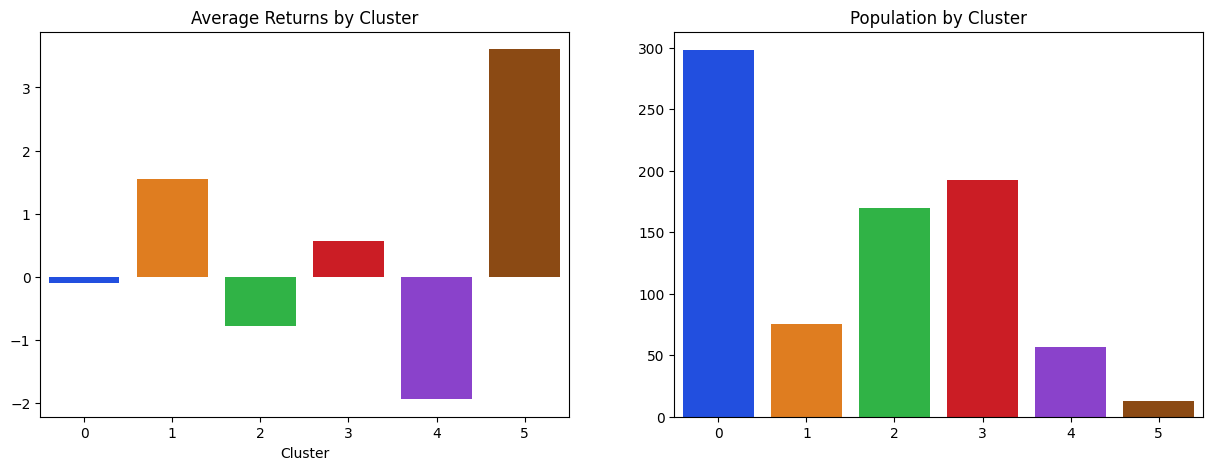

In [89]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.barplot(x=cluster_returns_train.index, y=cluster_returns_train.values, palette='bright', ax=axs[0])
sns.barplot(x=cluster_population_train.index, y=cluster_population_train.values, palette='bright', ax=axs[1])

axs[0].set(title='Average Returns by Cluster')

axs[1].set(title='Population by Cluster')

plt.show()

*   dar dataye train :
*   hamantor k dar nemudar mibinim clustere 2,3,5 motevasete nerkhe bazdehiye mosbat va clustere 0,1,4 motevasete nerkhe bazdehiye manfi darand.
*   nemudare population tedade dadeha dar cluster : k dar clustere 1 bishtarin tedade dade va clustere 2 kamtarin tedade dade ra darand

## Calculate the correlation matrix

In [90]:
corr_matrix_train = X_train.corr()

## Plot the heatmap

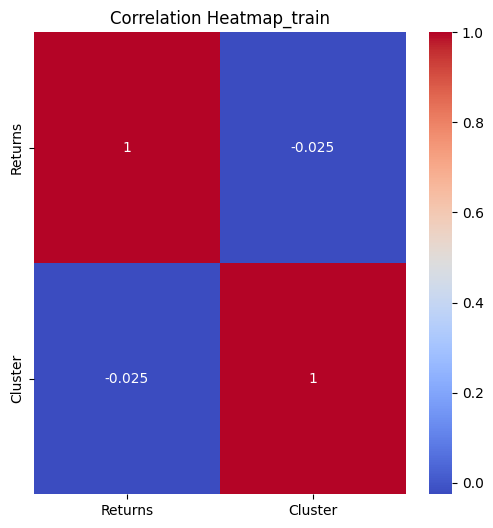

In [91]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap_train')
plt.show()

*   baraye cluster va return nerkhe bazdehi ra hesab mikonad
*   hambastegi bishtar az 1 range ghermez k hambastegi Ziyad darand.
*   hambastegi kamtar az 1 range abi k hambastegi kamtari darand.
*   hambastegi sefr yani features bitasir ruye ham ba range sefid
*   harche tedade cluter balatar beravad hambastegi bishtar va harche tedade cluster kamtar bahsad hambastegi kamtar
*   afzayeshe tedade cluster ziyad bazdehi ro bala nemibarad va ruye bazdehi ziyad moaser nist.

## Visualize the distribution of returns for each cluster using a box plot

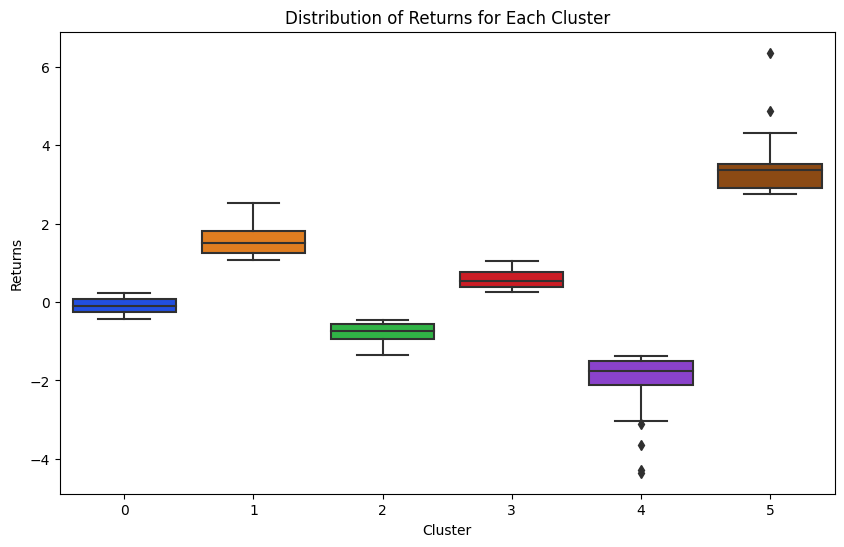

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=X_train, x='Cluster', y='Returns', palette='bright')
plt.title('Distribution of Returns for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Returns')
plt.show()

## Test_Data

## Calculate the average returns for each cluster
*   cluster_returns_test : motevasete bazdehiye har cluster

In [93]:
cluster_returns_test = X_test.groupby('Cluster')['Returns'].mean()
print(cluster_returns_test)

Cluster
0   -0.085035
1    1.405552
2   -0.822362
3    0.545958
4   -1.935104
5    3.184082
Name: Returns, dtype: float64


##Calculate the population of each cluster

In [94]:
cluster_population_test = X_test['Cluster'].value_counts()
print(cluster_population_test)

0    60
3    54
2    49
1    22
4    14
5     3
Name: Cluster, dtype: int64


## Plot the cluster returns and population

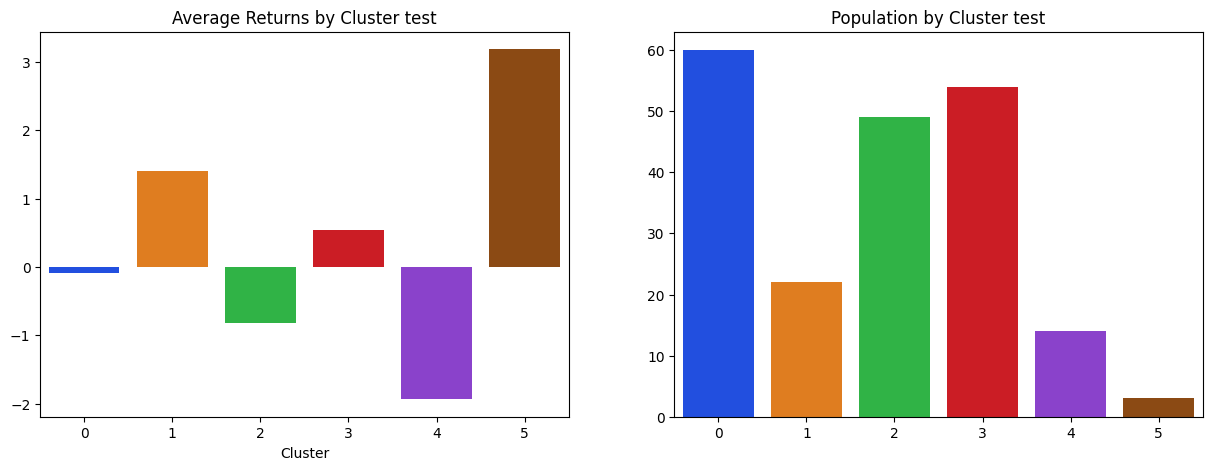

In [95]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.barplot(x=cluster_returns_test.index, y=cluster_returns_test.values, palette='bright', ax=axs[0])
sns.barplot(x=cluster_population_test.index, y=cluster_population_test.values, palette='bright', ax=axs[1])

axs[0].set(title='Average Returns by Cluster test')

axs[1].set(title='Population by Cluster test')

plt.show()

*   dar dataye test :
*   hamantor k dar nemudar mibinim clustere 2,3,5 motevasete nerkhe bazdehiye mosbat va clustere 0,1,4 motevasete nerkhe bazdehiye manfi darand.
*   nemudare population tedade dadeha dar cluster : k dar clustere 1 bishtarin tedade dade va clustere 2 kamtarin tedade dade ra darand

## Calculate the correlation matrix
*   fiture v target : corrolation positive(ham jahat), corrolation negative(khalafe jahat ham)
* fiture va target mostagheland. dar vaghe correlation hambastegi ra beyne 2 dadeye mostaghel neshan midahad.

In [96]:
corr_matrix_test = X_test.corr()

##Plot the heatmap

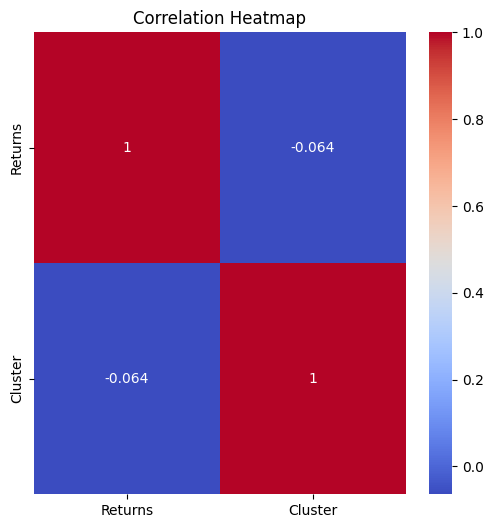

In [97]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix_test, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.show()

## Visualize the distribution of returns for each cluster using a box plot

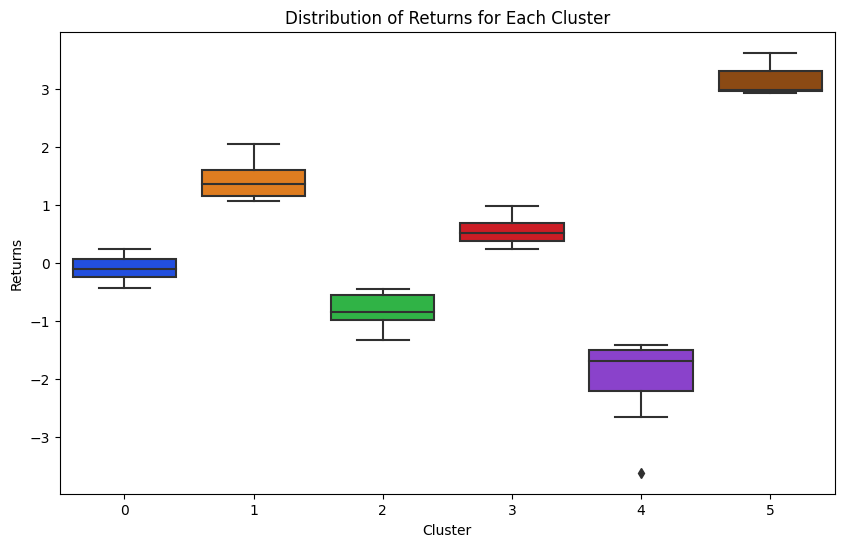

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=X_test, x='Cluster', y='Returns', palette='bright')
plt.title('Distribution of Returns for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Returns')
plt.show()

#Display of signal buying and selling with clustering algorithm and display of probability distribution and population distribution of clusters

## Define the stock specifications

In [99]:
stock_symbol = "GOLD"
start_date = "2019-07-15"
end_date = "2023-07-15"

## Download the stock data from Yahoo Finance

In [100]:
df= yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


##Calculate the percentage return of the closing price

In [101]:
df['pct_return'] = df['Adj Close'].pct_change()

##Remove the first row (which contains NaN values)

In [102]:
df.dropna(inplace=True)

##Perform k-means clustering with k=9

In [103]:
X = np.array(df['pct_return']).reshape(-1, 1)

In [104]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Define a function to calculate the cluster boundaries using the samples closest to the cluster center

In [105]:
def calculate_cluster_boundaries(cluster_indices, cluster_center):
    cluster_distances = np.abs(X[cluster_indices] - cluster_center)
    min_distance = np.min(cluster_distances)
    max_distance = np.max(cluster_distances)
    return min_distance, max_distance

##Add the cluster labels to the dataframe

In [106]:
df['cluster'] = kmeans.labels_

##Calculate the boundaries for each cluster

In [107]:
cluster_boundaries = {}

for i in range(4):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_center = kmeans.cluster_centers_[i]
    min_distance, max_distance = calculate_cluster_boundaries(cluster_indices, cluster_center)
    cluster_boundaries[i] = [min_distance, max_distance]

df['boundaries'] = df['cluster'].map(cluster_boundaries)

##Calculate the signals

In [108]:
df['signals'] = np.where(df['pct_return'] < df['boundaries'].apply(lambda x: x[0]), -1, np.where(df['pct_return'] > df['boundaries'].apply(lambda x: x[1]), 1, 0))

##Plot the signals

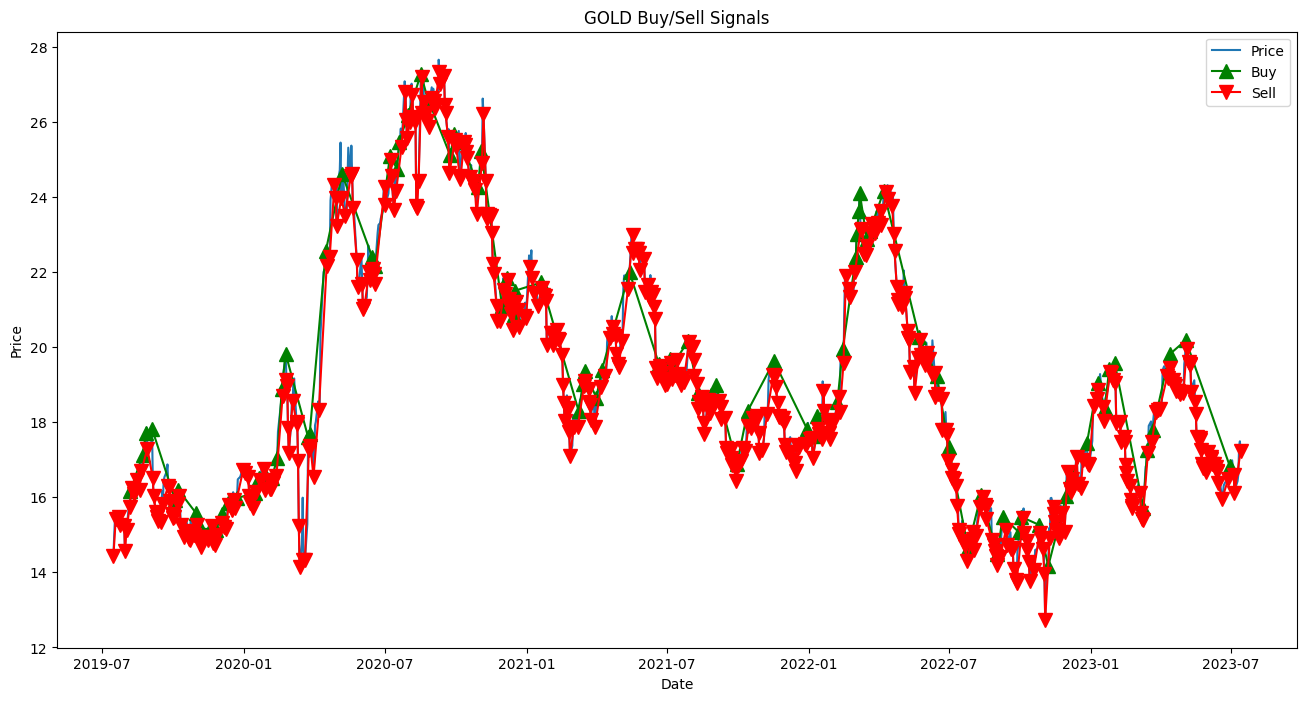

In [109]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='Price')
plt.plot(df[df['signals'] == 1]['Adj Close'], marker='^', markersize=10, color='g', label='Buy')
plt.plot(df[df['signals'] == -1]['Adj Close'], marker='v', markersize=10, color='r', label='Sell')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_symbol} Buy/Sell Signals')
plt.legend()
plt.show()

##Number of clusters

In [110]:
n_clusters = 4

##Define the stock specifications

In [111]:
stock_symbol = "GOLD"
start_date = "2019-07-15"
end_date = "2023-07-15"

##Download the stock data from Yahoo Finance

In [112]:
df= yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


##Calculate the daily returns

In [113]:
df['Returns'] = df['Close'].pct_change()

##Drop the first row (which has a NaN value)

In [114]:
df = df.dropna()

## Preprocess the data
*   gharar dadane bazdehiye ruzane dar X

In [115]:
X = df[['Returns']]

##Standardize the data
*   Normalize beyne miyangine 0 va Variance

In [116]:
X = (X - X.mean()) / X.std()
print(X)

             Returns
Date                
2019-07-16 -0.605134
2019-07-17  1.548894
2019-07-18  1.266703
2019-07-19 -0.038707
2019-07-22  0.302722
...              ...
2023-07-10  0.473724
2023-07-11  0.442717
2023-07-12  1.919780
2023-07-13  0.273812
2023-07-14 -0.610535

[1007 rows x 1 columns]


## Define and initialize kmeans object
*   algorithm K-Means ra ba tedad clusteri k drim emal mikonim

In [117]:
kmeans = KMeans(n_clusters=n_clusters)

*   Run K-Means algorithm on data

In [118]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

## Calculate estimated cluster probability for each candle
*   ehtemale khushe takhmini baaye har candle.

In [119]:
dists = kmeans.transform(X)
probs_i = np.zeros((len(X), n_clusters))

for j in range(len(X)):

    probs_i_j = [1 / d for d in dists[j]]

    prob_i_j = probs_i_j / sum(probs_i_j)

    probs_i[j] = prob_i_j

## Pie chart of cluster population
*   nemudare dayereiye jamiyate khushehi
*   nemudare dayeii ehtemale taaloghe har nemune be khushe ra be ma neshun midahad baraye 6ta clusteri k darad.

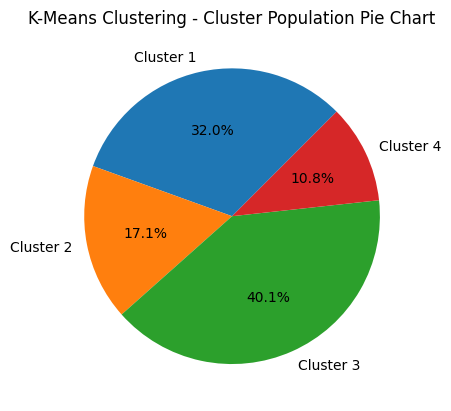

In [120]:
cluster_populations = np.zeros(n_clusters)

for i in range(n_clusters):

    cluster_populations[i] = np.sum(probs_i[:, i])

plt.pie(cluster_populations, labels=['Cluster {}'.format(i+1) for i in range(n_clusters)], startangle=45, autopct='%1.1f%%')

plt.title('K-Means Clustering - Cluster Population Pie Chart')
plt.show()

## Distribution plot of cluster probabilities for a single data point
*   tozihe ehtemalate khushe baraye yek dadeye vahed

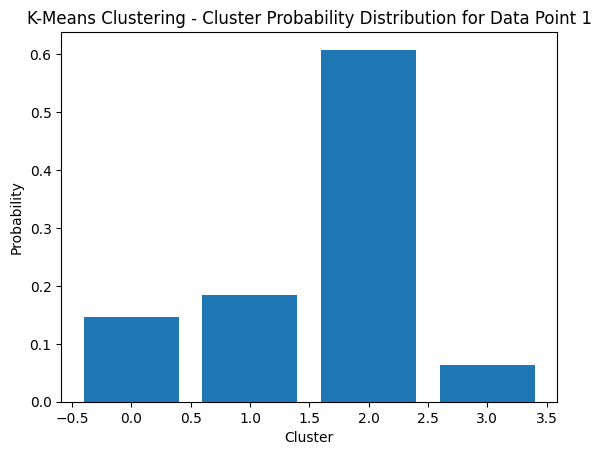

In [121]:
idx = 0
plt.bar(range(n_clusters), probs_i[idx])
plt.title('K-Means Clustering - Cluster Probability Distribution for Data Point {}'.format(idx+1))
plt.xlabel('Cluster')
plt.ylabel('Probability')
plt.show()

## Distribution plot of cluster probabilities for all data points
*   tozihe ehtemalate khushe baraye hamye noghate dadeh

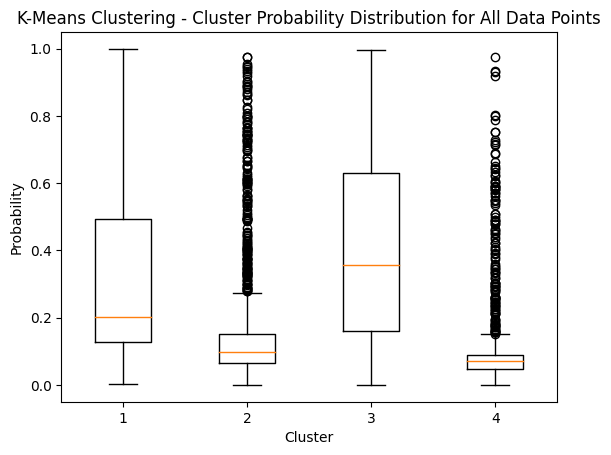

In [122]:
plt.boxplot(probs_i)
plt.title('K-Means Clustering - Cluster Probability Distribution for All Data Points')
plt.xlabel('Cluster')
plt.ylabel('Probability')
plt.show()

## Histogram of cluster population
*   histigram jamiiyate khushe ha
* tedade nemunehaye motealegh be har cluster ra bar migardanad.

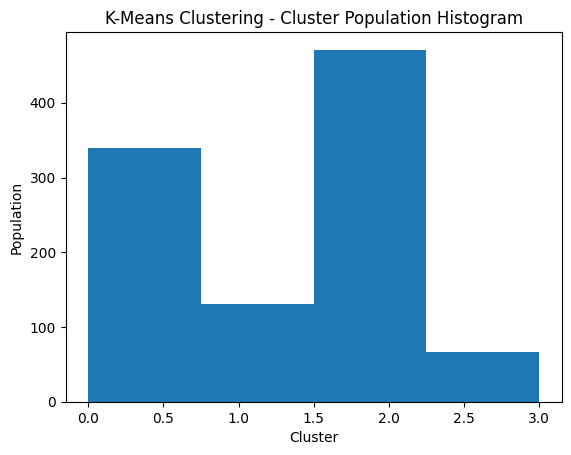

In [123]:
plt.hist(kmeans.labels_, bins=n_clusters)
plt.title('K-Means Clustering - Cluster Population Histogram')
plt.xlabel('Cluster')
plt.ylabel('Population')
plt.show()